In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/salary_data_cleaned.csv')

In [ ]:
df.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [ ]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Job Title,0
Salary Estimate,0
Job Description,0
Rating,0
Company Name,0
Location,0
Headquarters,0
Size,0
Founded,0
Type of ownership,0


In [ ]:
df.shape

(742, 28)

In [ ]:
df["Job Title"].value_counts()

,count
Job Title,
Data Scientist,131
Data Engineer,53
Senior Data Scientist,34
Data Analyst,15
Senior Data Engineer,14
...,...
Data Scientist (Warehouse Automation),1
Jr. Data Scientist,1
Data Architect / Data Modeler,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_salary         742 non

Text(0.5, 1.0, 'Average Salary Distribution')

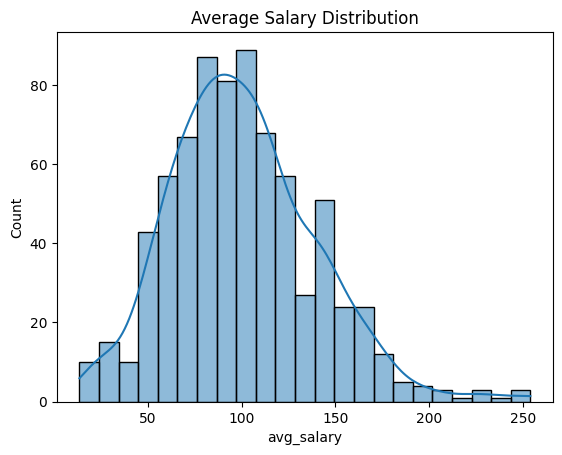

In [ ]:
sns.histplot(df['avg_salary'], kde=True)
plt.title('Average Salary Distribution')

Conclusion - employee with average salary between 50$ - 150$ ( in $) are more in companies

Text(0, 0.5, 'Average Salary')

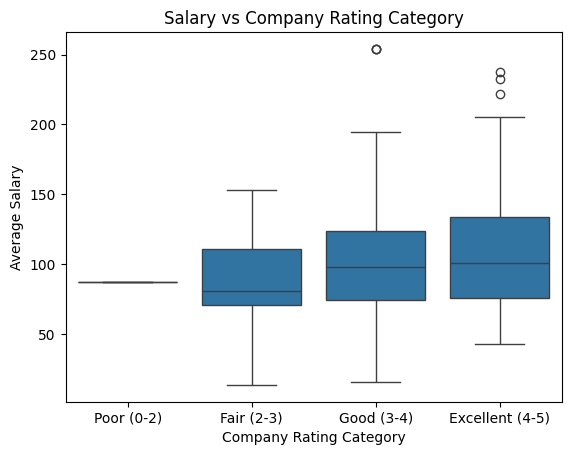

In [ ]:
# Define rating bins and labels
bins = [0, 2, 3, 4, 5]
labels = ['Poor (0-2)', 'Fair (2-3)', 'Good (3-4)', 'Excellent (4-5)']

# Create a new column
df['rating_category'] = pd.cut(df['Rating'], bins=bins, labels=labels)

# Now plot
sns.boxplot(x='rating_category', y='avg_salary', data=df, order=labels)
plt.title('Salary vs Company Rating Category')
plt.xlabel('Company Rating Category')
plt.ylabel('Average Salary')

Conclusion - most of employee have high avg salary in a company with good rating . hight salary --> high rating

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '501 to 1000 employees'),
  Text(1, 0, '10000+ employees'),
  Text(2, 0, '1001 to 5000 employees'),
  Text(3, 0, '51 to 200 employees'),
  Text(4, 0, '201 to 500 employees'),
  Text(5, 0, '5001 to 10000 employees'),
  Text(6, 0, '1 to 50 employees'),
  Text(7, 0, 'Unknown'),
  Text(8, 0, '-1')])

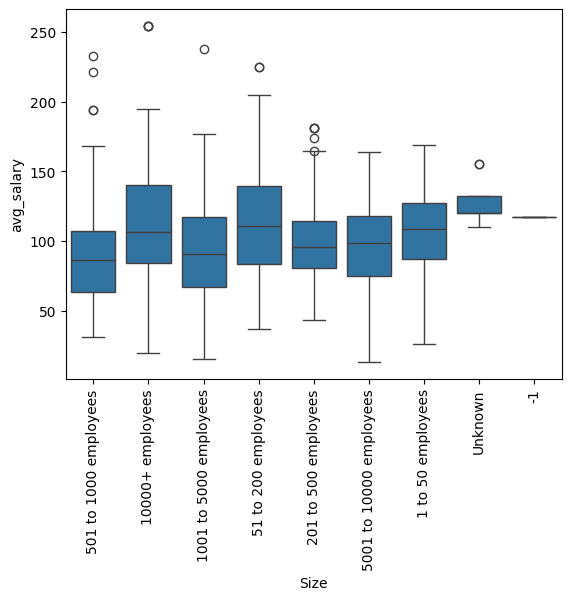

In [ ]:
sns.boxplot(x='Size', y='avg_salary', data=df)
plt.xticks(rotation=90)

Coclusion - 10000 + emp & 51 to 200 emp has more avg salary

In [ ]:
df.Size.value_counts()

,count
Size,
1001 to 5000 employees,150
501 to 1000 employees,134
10000+ employees,130
201 to 500 employees,117
51 to 200 employees,94
5001 to 10000 employees,76
1 to 50 employees,31
Unknown,9
-1,1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Aerospace & Defense'),
  Text(1, 0, 'Health Care Services & Hospitals'),
  Text(2, 0, 'Advertising & Marketing'),
  Text(3, 0, 'Consulting'),
  Text(4, 0, 'Internet'),
  Text(5, 0, 'Biotech & Pharmaceuticals'),
  Text(6, 0, 'Enterprise Software & Network Solutions'),
  Text(7, 0, 'Insurance Carriers'),
  Text(8, 0, 'IT Services'),
  Text(9, 0, 'Computer Hardware & Software')])

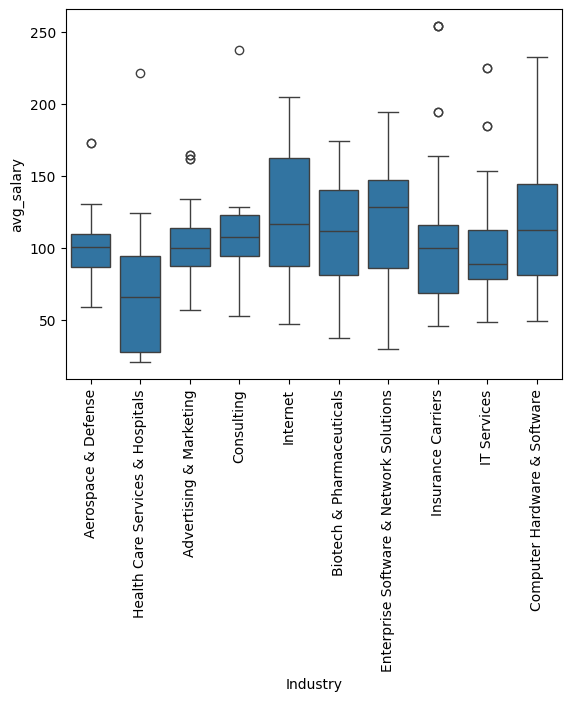

In [ ]:
top_industries = df['Industry'].value_counts().nlargest(10).index
sns.boxplot(x='Industry', y='avg_salary', data=df[df['Industry'].isin(top_industries)])
plt.xticks(rotation=90)

Coclusion - Industries like Internet, software and network solution , computer software and hardware have more avg salaries

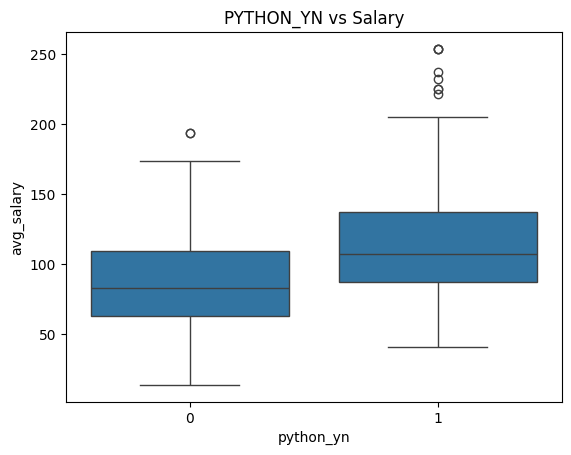

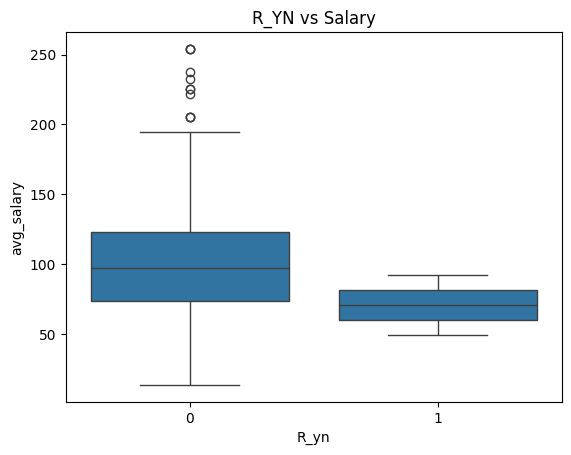

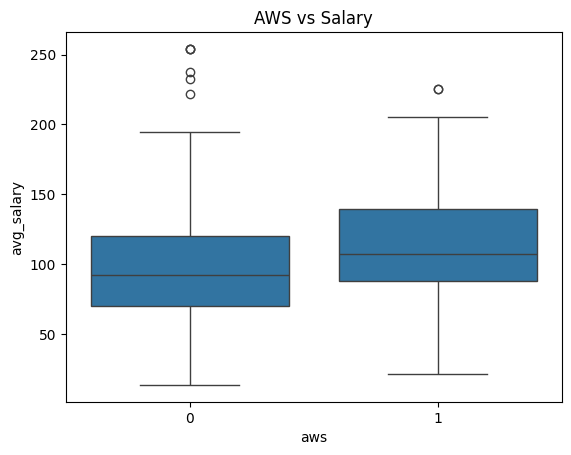

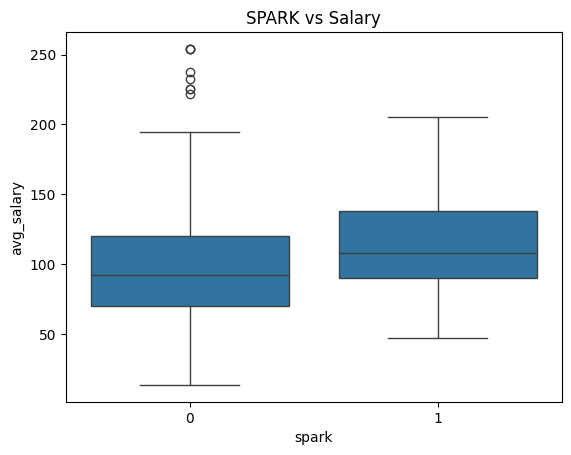

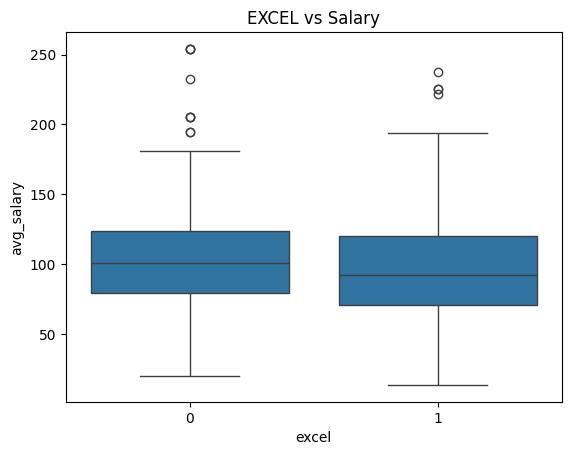

In [ ]:
skills = ['python_yn', 'R_yn', 'aws', 'spark', 'excel']
for skill in skills:
    sns.boxplot(x=skill, y='avg_salary', data=df)
    plt.title(f'{skill.upper()} vs Salary')
    plt.show()


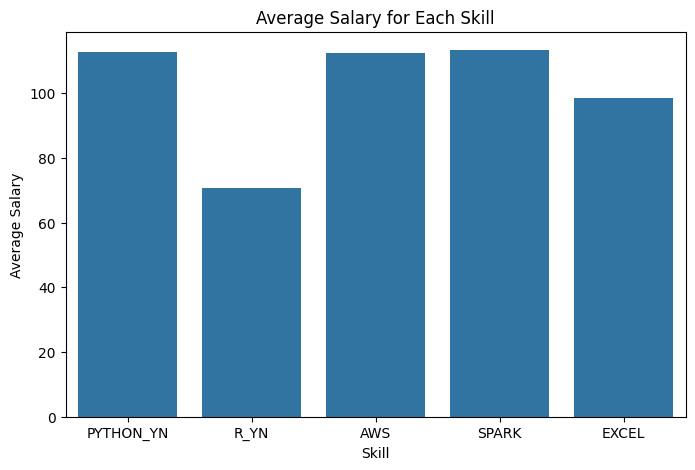

In [ ]:
import matplotlib.pyplot as plt

skill_salary = {}
for skill in skills:
    skill_salary[skill.upper()] = df[df[skill] == 1]['avg_salary'].mean()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=list(skill_salary.keys()), y=list(skill_salary.values()))
plt.title("Average Salary for Each Skill")
plt.ylabel("Average Salary")
plt.xlabel("Skill")
plt.show()


Coclusion - More Trending skills are python, aws , spark

There are lot many job title so we need to group them for modeling

In [ ]:
def simplify_job_title(title):
    title = title.lower()
    if 'data scientist' in title or 'ml engineer' in title or 'machine learning' in title:
        return 'Data Scientist'
    elif 'data engineer' in title or 'big data engineer' in title:
        return 'Data Engineer'
    elif 'analyst' in title:
        return 'Data Analyst'
    elif 'manager' in title:
        return 'Manager'
    elif 'director' in title:
        return 'Director'
    elif 'scientist' in title:
        return 'Scientist'
    elif 'consultant' in title:
        return 'Consultant'
    elif 'architect' in title:
        return 'Architect'
    elif 'intern' in title or 'junior' in title or 'jr.' in title:
        return 'Intern/Junior'
    elif 'research' in title:
        return 'Research Scientist'
    else:
        return 'Other'


In [ ]:
df['job_title_grouped'] = df['Job Title'].apply(simplify_job_title)

In [ ]:
df.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,job_state,same_state,age,python_yn,R_yn,spark,aws,excel,rating_category,job_title_grouped
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,NM,0,47,1,0,0,0,1,Good (3-4),Data Scientist
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,MD,0,36,1,0,0,0,0,Good (3-4),Data Scientist
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,FL,1,10,1,0,1,0,1,Excellent (4-5),Data Scientist
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,WA,1,55,1,0,0,0,0,Good (3-4),Data Scientist
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,NY,1,22,1,0,0,0,1,Fair (2-3),Data Scientist


In [ ]:
df['job_title_grouped'].value_counts()

,count
job_title_grouped,
Data Scientist,301
Scientist,143
Data Engineer,119
Data Analyst,102
Other,28
Manager,22
Director,14
Consultant,8
Architect,3


In [ ]:
# Feature Selection
df.drop(['Salary Estimate', 'Job Description', 'Location', 'Company Name',
         'Competitors', 'Headquarters', 'Founded','rating_category','Job Title'], axis=1, inplace=True)

In [ ]:
df.shape

(742, 21)

In [ ]:
df.head(5)

,Rating,Size,Type of ownership,Industry,Sector,Revenue,hourly,employer_provided,min_salary,max_salary,...,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel,job_title_grouped
0,3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,53,91,...,Tecolote Research\n,NM,0,47,1,0,0,0,1,Data Scientist
1,3.4,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,63,112,...,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0,Data Scientist
2,4.8,501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,80,90,...,KnowBe4\n,FL,1,10,1,0,1,0,1,Data Scientist
3,3.8,1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),0,0,56,97,...,PNNL\n,WA,1,55,1,0,0,0,0,Data Scientist
4,2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,0,0,86,143,...,Affinity Solutions\n,NY,1,22,1,0,0,0,1,Data Scientist


In [ ]:
df.isnull().sum()

,0
Rating,0
Size,0
Type of ownership,0
Industry,0
Sector,0
Revenue,0
hourly,0
employer_provided,0
min_salary,0
max_salary,0


In [ ]:
df['Job Title'].unique()

array(['Data Scientist', 'Healthcare Data Scientist',
       'Research Scientist', 'Staff Data Scientist - Technology',
       'Data Analyst', 'Data Engineer I', 'Scientist I/II, Biology',
       'Customer Data Scientist',
       'Data Scientist - Health Data Analytics',
       'Senior Data Scientist / Machine Learning',
       'Data Scientist - Quantitative', 'Digital Health Data Scientist',
       'Associate Data Analyst', 'Clinical Data Scientist',
       'Data Scientist / Machine Learning Expert', 'Web Data Analyst',
       'Senior Data Scientist', 'Data Engineer',
       'Data Scientist - Algorithms & Inference', 'Scientist',
       'Lead Data Scientist', 'Spectral Scientist/Engineer',
       'College Hire - Data Scientist - Open to December 2019 Graduates',
       'Data Scientist, Office of Data Science', 'Data Science Analyst',
       'Senior Risk Data Scientist',
       'Data Scientist in Artificial Intelligence Early Career',
       'Data Scientist - Research', 'R&D Data Analy

In [ ]:
# Encode Categorical Features
categorical_cols = ['Type of ownership', 'Industry', 'Sector', 'Revenue', 'Size', 'job_state', 'company_txt','job_title_grouped']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
# train and test split
from sklearn.model_selection import train_test_split

X = df.drop('avg_salary', axis=1)
y = df['avg_salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X.columns

Index(['Rating', 'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'same_state', 'age', 'python_yn', 'R_yn', 'spark',
       ...
       'company_txt_webfx.com\n', 'job_title_grouped_Consultant',
       'job_title_grouped_Data Analyst', 'job_title_grouped_Data Engineer',
       'job_title_grouped_Data Scientist', 'job_title_grouped_Director',
       'job_title_grouped_Intern/Junior', 'job_title_grouped_Manager',
       'job_title_grouped_Other', 'job_title_grouped_Scientist'],
      dtype='object', length=514)

In [ ]:
# Model Training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluation
print("Linear Regression:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_lr):.2f}")

Linear Regression:
MAE: 0.00
MSE: 0.00
RMSE: 0.00
R^2 Score: 1.00


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_rf):.2f}")

Random Forest:
MAE: 0.73
MSE: 2.38
R^2 Score: 1.00


Conclusion:

In linear regression there was Target leakage (your model saw the answers) thats why it performed to good bcoz it already had min and max salary which made it easy to interpret.

In [ ]:
X = df.drop(['avg_salary', 'min_salary', 'max_salary'], axis=1)
y = df['avg_salary']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model Training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluation
print("Linear Regression:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_lr):.2f}")

Linear Regression:
MAE: 14.23
MSE: 551.67
RMSE: 23.49
R^2 Score: 0.66


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_rf):.2f}")

Random Forest:
MAE: 11.82
MSE: 340.35
RMSE: 23.49
R^2 Score: 0.79


Random Forest clearly outperforms Linear Regression across all metrics:

Lower errors (MAE, MSE, RMSE)

Higher R² → More variance in salary is explained